<a href="https://colab.research.google.com/github/ipanditi/pandit_gpt/blob/main/pandit_gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Get the dataset. Trying tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-06-04 15:04:32--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2023-06-04 15:04:32 (36.6 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [3]:
#read and inspect
with open('input.txt', 'r', encoding='utf-8') as f:
  text = f.read()

In [4]:
print("length of the characters is: ", len(text))

length of the characters is:  1115394


In [5]:
#let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [6]:
#Take out all the unique characters: Data structure to be used is ofcourse set
chars = sorted(list(set(text))) #Sorted according to the respective ascii values
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [7]:
#mapping of chars to integers
stoi = {ch:i for i,ch in enumerate(chars)}
itos = {i:ch for i,ch in enumerate(chars)}
print(stoi)
print(itos)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}
{0: '\n', 1: ' ', 2: '!', 3: '$', 4: '&', 5: "'", 6: ',', 7: '-', 8: '.', 9: '3', 10: ':', 11: ';', 12: '?', 13: 'A', 14: 'B', 15: 'C', 16: 'D', 17: 'E', 18: 'F', 19: 'G', 20: 'H', 21: 'I', 22: 'J', 23: 'K', 24: 'L', 25: 'M', 26: 'N', 27: 'O', 28: 'P', 29: 'Q', 30: 'R', 31: 'S', 32: 'T', 33: 'U', 34: 'V', 35: 'W', 36: 'X', 37: 'Y', 38: 'Z', 39: 'a', 40: 'b', 41: 'c', 42: 'd', 43: 'e', 44: 'f', 45: 'g', 46: 'h', 47: 'i',

In [8]:
#Encoding: performs string to integer operation
encode = lambda s: [stoi[c] for c in s]

#Decoder: performs integer to string operation
decode = lambda l: ''.join(itos[i] for i in l)

#Print
print(encode("Hello World!"))
print(decode(encode("Hello World!")))

[20, 43, 50, 50, 53, 1, 35, 53, 56, 50, 42, 2]
Hello World!


In [9]:
#Let's encode the whole dataset and store it in a torch.Tensor
import torch
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) #11,15,394 

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [10]:
#Split the dataset 90% train and 10% val set
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [11]:
#How Language Models work basically:
block_size = 8
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
  context = x[:t+1]
  target = y[t]
  print(f"When input is {context}, the output is {target}")

When input is tensor([18]), the output is 47
When input is tensor([18, 47]), the output is 56
When input is tensor([18, 47, 56]), the output is 57
When input is tensor([18, 47, 56, 57]), the output is 58
When input is tensor([18, 47, 56, 57, 58]), the output is 1
When input is tensor([18, 47, 56, 57, 58,  1]), the output is 15
When input is tensor([18, 47, 56, 57, 58,  1, 15]), the output is 47
When input is tensor([18, 47, 56, 57, 58,  1, 15, 47]), the output is 58


In [12]:
#Parallel data processing
torch.manual_seed(1337)
batch_size = 4 #how many independent sequences will we process in parallel?
block_size = 8 #what is the maximum context length for predictions?

def get_batch(split):
  #generate a small batch of data of inputs x and y
  data = train_data if split =="train" else val_data
  ix = torch.randint(len(data) - block_size, (batch_size,))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  return x,y

xb, yb = get_batch('train')
print(f"inputs: {xb.shape, xb} \n targets: {yb.shape, yb}")

print('--------------------------')
for b in range(batch_size):
  for t in range(block_size):
    context = xb[b,:t+1]
    y = yb[b,t]
    print(f"When input is {context}, the ouptup is {y} ")


inputs: (torch.Size([4, 8]), tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])) 
 targets: (torch.Size([4, 8]), tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]]))
--------------------------
When input is tensor([24]), the ouptup is 43 
When input is tensor([24, 43]), the ouptup is 58 
When input is tensor([24, 43, 58]), the ouptup is 5 
When input is tensor([24, 43, 58,  5]), the ouptup is 57 
When input is tensor([24, 43, 58,  5, 57]), the ouptup is 1 
When input is tensor([24, 43, 58,  5, 57,  1]), the ouptup is 46 
When input is tensor([24, 43, 58,  5, 57,  1, 46]), the ouptup is 43 
When input is tensor([24, 43, 58,  5, 57,  1, 46, 43]), the ouptup is 39 
When input is tensor([44]), the ouptup is 53 
When input is tensor([44, 53]), the ouptup is 56

In [13]:
#Bigram model
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size) -> None:
    super().__init__()
    #each token directly reads off the logits for the next token from a lookup table
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
  
  def forward(self, idx, targets=None):
    #idx and targets are both (Batch,Time) tensor of integers
    #logits = Prediction scores
    logits = self.token_embedding_table(idx) #(B,T,C)

    if targets is None:
      loss = None
    else:
      B,T,C = logits.shape
      logits = logits.view(B*T, C) #Reducing the dimension from 3 to 2 
      targets = targets.view(B*T)   
      #Loss function: -log likelihood
      loss = F.cross_entropy(logits, targets)
    return logits, loss

  #Generate the next sequence, (B,T) -> (B,T+1) -> (B,T+2)
  def generate(self, idx, max_new_tokens):
    #idx is (B,T) array of indices in the current context
    for _ in range(max_new_tokens):
      #get the predictions
      logits, loss = self(idx)
      #focus only on the last time step
      #Markov model 
      logits = logits[:,-1,:] #becomes (B,C)
      #apply softmax
      probs = F.softmax(logits, dim = -1) #(B,C)
      #sample from the probability distribution
      idx_next = torch.multinomial(probs, num_samples=1) #(B,1)
      #append the sampled index to the running sequence
      idx = torch.cat((idx, idx_next), dim = 1) #(B,T+1)
    return idx

#Create an instance of the model
m = BigramLanguageModel(vocab_size) #(Batch = 4, Time = 8, Channel = 65)
logits, loss = m(xb,yb)
print(logits.shape)
print(loss)

idx = torch.zeros((1,1), dtype=torch.long)
print(decode(m.generate(idx, max_new_tokens=100)[0].tolist()))

torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


In [14]:
#Training the model 
#Create a pytorch Adam optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr = 1e-3)

In [15]:
batch_size = 32
for steps in range(10000):
  #sample the batch of data
  xb, yb = get_batch('train')

  #evaluate the loss
  logits, loss = m(xb, yb)
  #initialize the weights to zero
  optimizer.zero_grad(set_to_none=True)
  #backpropagate
  loss.backward()
  #call the step function
  optimizer.step()

print(loss.item())

2.5727508068084717


In [16]:
print(decode(m.generate(idx, max_new_tokens=400)[0].tolist()))


Iyoteng h hasbe pave pirance
Rie hicomyonthar's
Plinseard ith henoure wounonthioneir thondy, y heltieiengerofo'dsssit ey
KIN d pe wither vouprrouthercc.
hathe; d!
My hind tt hinig t ouchos tes; st yo hind wotte grotonear 'so it t jod weancotha:
h hay.JUCle n prids, r loncave w hollular s O:
HIs; ht anjx?

DUThinqunt.

LaZAnde.
athave l.
KEONH:
ARThanco be y,-hedarwnoddy scace, tridesar, wnl'shenou


**MATH TRICK IN SELF-ATTENTION**

In [17]:
torch.manual_seed(1337)
B,T,C = 4,8,2
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [18]:
#We want x[b,t] = mean {i<=t} x[b,i]
xbow = torch.zeros((B,T,C))
for b in range(B):
  for t in range(T):
    xprev = x[b,:t+1] #(t,C)
    xbow[b,t] = torch.mean(xprev,0)

In [26]:
#Batch weighted multiplier : Version 2
wei = torch.tril(torch.ones(T,T))
wei /= wei.sum(1, keepdim=True)
xbow2 = wei @ x #(B,T,T) @ (B,T,C) -----> (B,T,C)
torch.allclose(xbow, xbow2)

True

In [28]:
#Version 3
tril = torch.tril(torch.ones(T,T)) #Lower triangular matrix
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril==0, float('-inf'))
wei = F.softmax(wei, dim = 1) #We should not let the future affect the present since we are predicting it
xbow3 = wei @ x
torch.allclose(xbow,  xbow3)

True

In [34]:
#Version 4:self-attention: Data dependent affinity of one char to the ones in the past
torch.manual_seed(1337)
B,T,C = 4,8,32
x = torch.randn(B,T,C)
#In self-attention, every character will emit 2 vectors, key and query
head_size = 16
#What do i contain
key = nn.Linear(C, head_size, bias=False)
#What is my value, which is what I will communicate with you
value = nn.Linear(C, head_size, bias=False)
#What am i looking for
query = nn.Linear(C, head_size, bias = False)
#Now the weights are dot products of the key and the query vectors
k = key(x) #(B,T,16)
q = query(x) #(B,T,16)
v = value(x) #(B,T,16)
#weights represent the affinity of a char to a char in the past
wei = q @ k.transpose(-2, -1)  #(B,T,16) @ (B,16,T) ----> (B,T,T)

tril = torch.tril(torch.ones(T,T))
#wei = torch.zeros((T,T))
#Dont let future affect the present
wei = wei.masked_fill(tril==0, float('-inf')) #This is an encoder block
#where we dont let the future nodes to talk to the past and the current nodes.
#Whereas if we comment out that line of code, we are letting all the nodes to talk to each other.
#This is called a decoder block. Might be useful in sentiment analysis.
wei = F.softmax(wei, dim =-1)
out = wei @ v
out.shape

torch.Size([4, 8, 16])

**ATTENTION**
Attention is a communication mechanism in a DAG.
- Every node has a vector of information and it is the aggregate the information via a weighted sum from all the nodes pointing to tht particular node.
- Attention has no notion of space. They have no idea where they are positioned in the space.
- So we need to provide each node with a spatial vector, giving itself an address sort of thing.

- An element emits a query 
  - For example, 'b' is looking for a vowel, it sends a query asking for a vowel present in the first 4 characters.
- All the rest of the elements emit their respective keys. 
 - Say 'o' emits "I am at position 2, and I am a vowel".
 -Even 'a' might emit a similar key.
- "b" chooses the vowel with highest affinity towards it, which is measured by the weight (dot product of the query and key). Its a match! Hooray!
- Now, "b" starts learning more about its matched partner "o" through the softmax layer.
- Cross batch communication is not allowed. They only talk in their province.

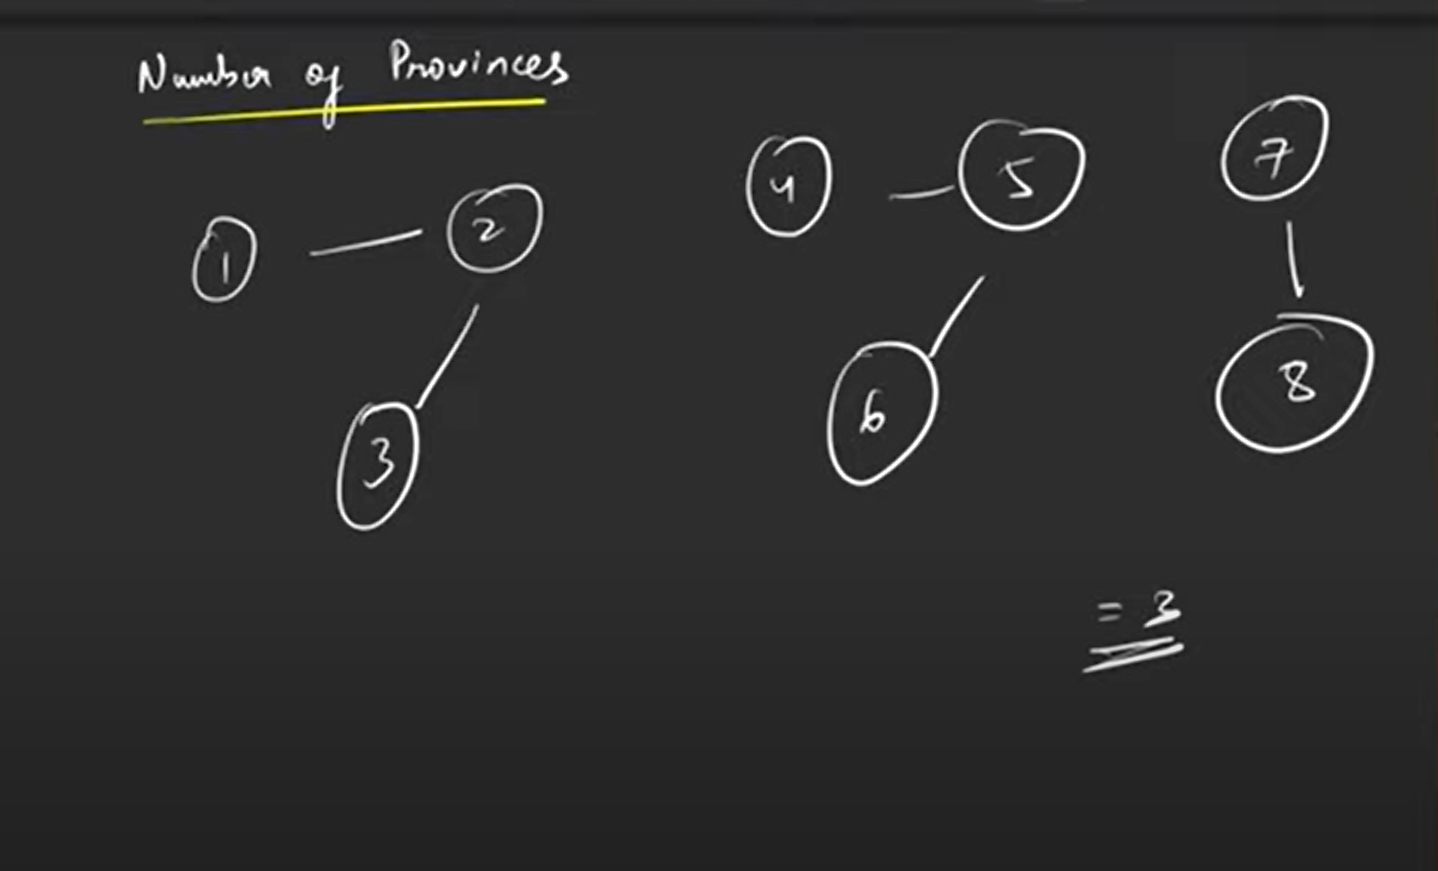

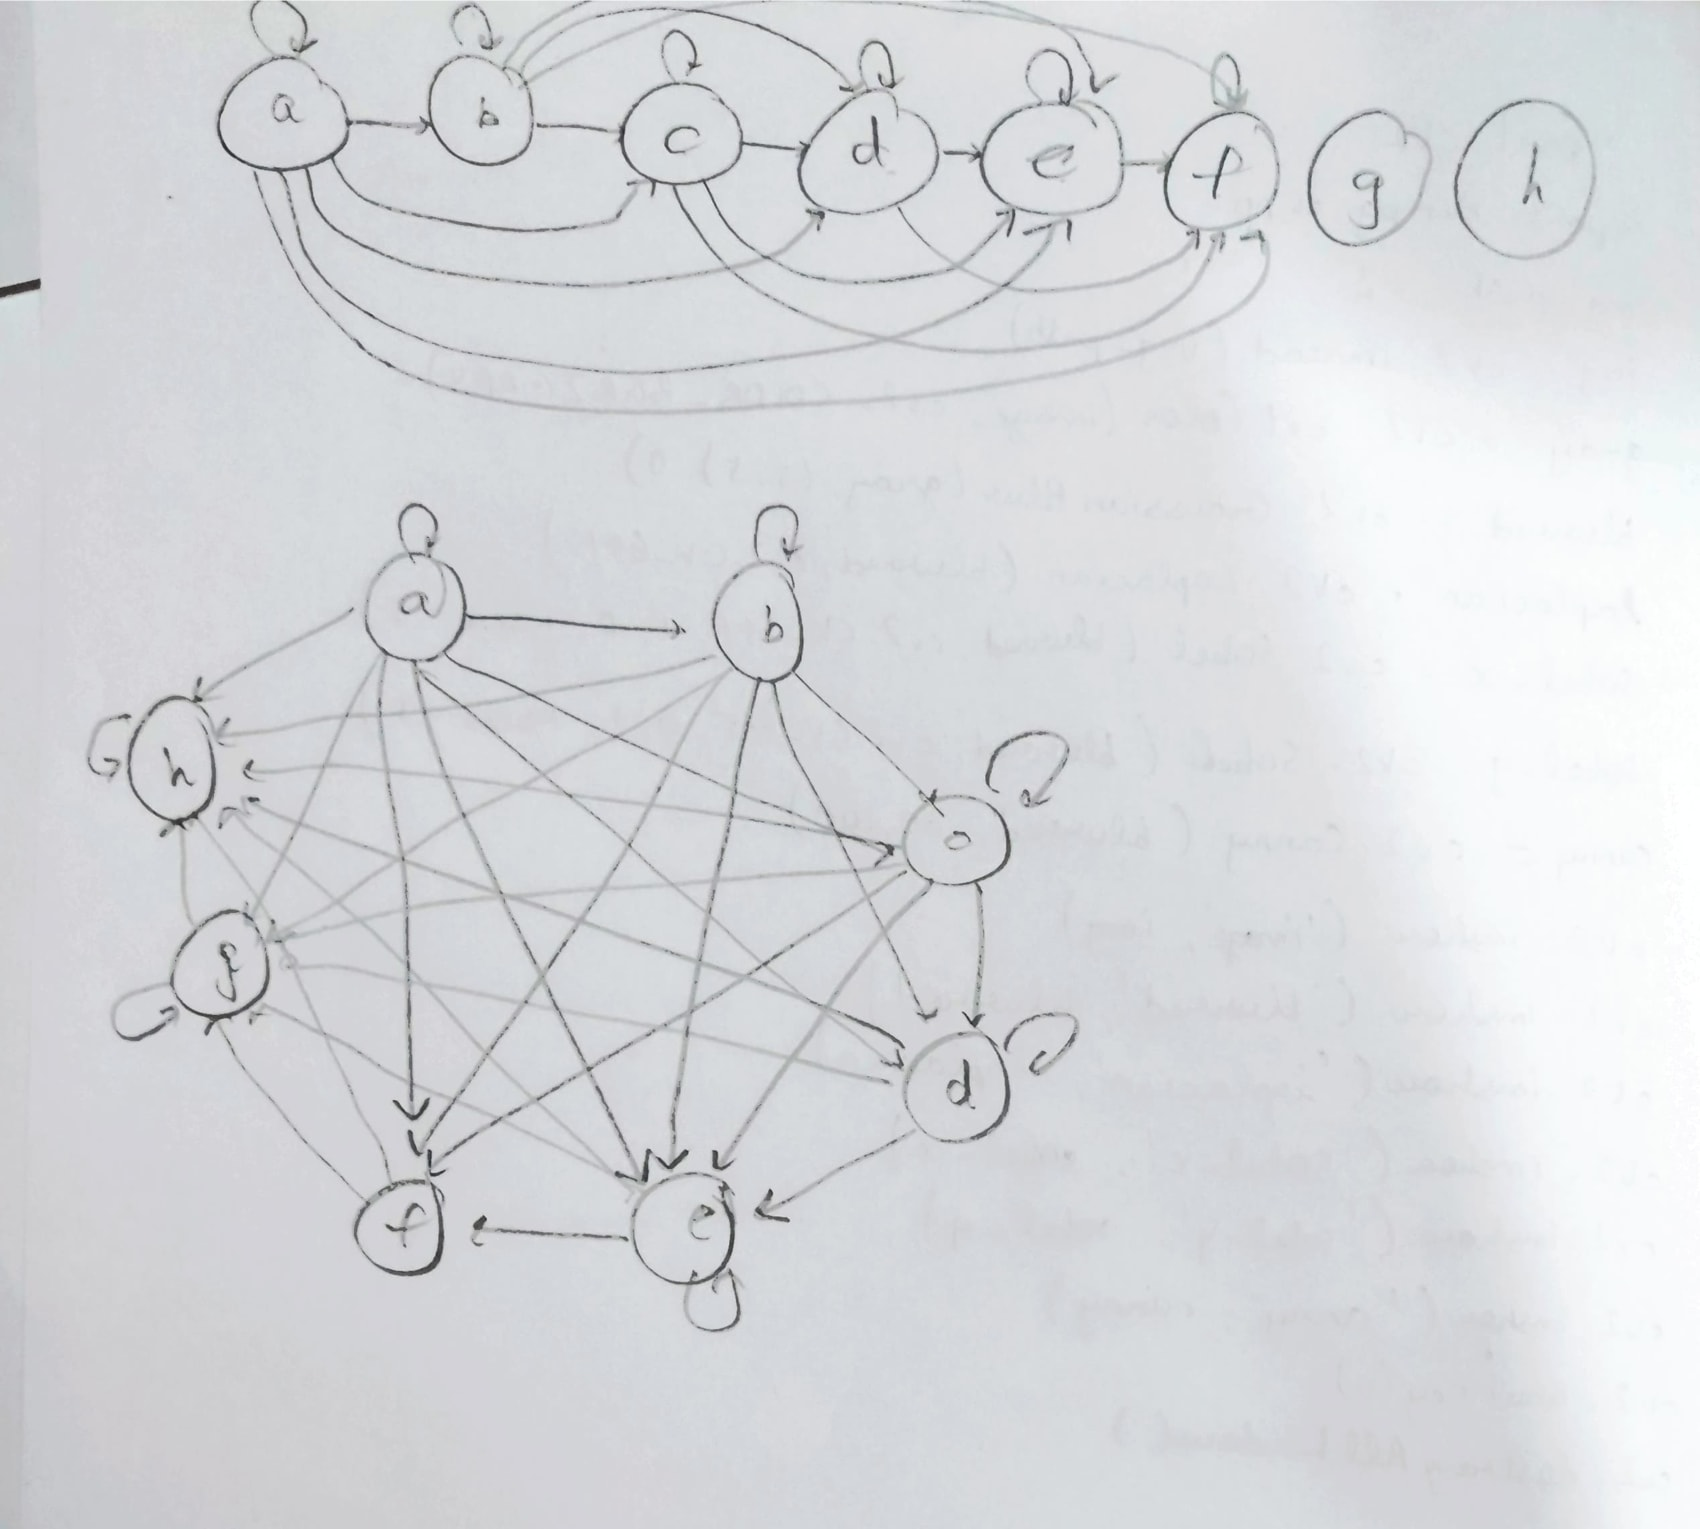

**SELF ATTENTION**

It just means that the keys, queries and values are emitted by the same node.

**CROSS ATTENTION**

The queries, keys and values are emitted by different nodes. Basically info retreival. Most used in encoder-decoder transformer models.

In [36]:
n_embd = 64
class Head(nn.Module):
  ''' One head of self attention'''
  def __init__(self, head_size):
    super().__init__()
    self.key = nn.Linear(n_embd, head_size, bias=False)
    self.query = nn.Linear(n_embd, head_size, bias=False)
    self.value = nn.Linear(n_embd, head_size, bias=False)
    self.register_buffer("tril", torch.tril(torch.ones(block_size, block_size)))

  def forward(self,x):
    B,T,C = x.shape
    k = self.key(x)
    q = self.query(x)
    wei = q@k.transpose[-2,-1] * C**-0.5
    wei = wei.masked_fill(self.tril[:T,:T]==0, float('-inf'))
    wei = F.softmax(wei, dim=-1)
    v = self.value(x)
    out = wei @ v
    return out

In [37]:
class MultiHeadAttention(nn.Module):
  '''Multiple self-attention heads in parallel'''

  def __init__(self,num_heads, head_size):
    super().__init__()
    self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])

  def forward(self,x):
    return torch.cat([h(x) for h in self.heads], dim=-1)

**FINAL CODE**

In [38]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


0.209729 M parameters
step 0: train loss 4.4116, val loss 4.4022
step 100: train loss 2.6568, val loss 2.6670
step 200: train loss 2.5091, val loss 2.5059
step 300: train loss 2.4194, val loss 2.4335
step 400: train loss 2.3500, val loss 2.3564
step 500: train loss 2.2965, val loss 2.3127
step 600: train loss 2.2412, val loss 2.2502
step 700: train loss 2.2047, val loss 2.2183
step 800: train loss 2.1642, val loss 2.1874
step 900: train loss 2.1249, val loss 2.1506
step 1000: train loss 2.1030, val loss 2.1297
step 1100: train loss 2.0700, val loss 2.1182
step 1200: train loss 2.0384, val loss 2.0800
step 1300: train loss 2.0252, val loss 2.0643
step 1400: train loss 1.9916, val loss 2.0358
step 1500: train loss 1.9703, val loss 2.0305
step 1600: train loss 1.9626, val loss 2.0485
step 1700: train loss 1.9413, val loss 2.0144
step 1800: train loss 1.9087, val loss 1.9962
step 1900: train loss 1.9089, val loss 1.9891
step 2000: train loss 1.8865, val loss 1.9969
step 2100: train loss 1.

In [39]:
with open("output.txt", "a") as f:
  print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()), file=f)